In [1]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 

import seaborn as sns
sns.set(color_codes = True)
sns.set(style = 'white')

In [2]:
train = pd.read_excel(r"C:\Users\anish\Downloads\retail_train.xlsx")
test = pd.read_excel(r"C:\Users\anish\Downloads\retail_test.xlsx")

In [3]:
print("Shape of train data")
print("-------------------")
print(train.shape)
print("-------------------")
print("Columns of train data")
print("---------------------")
print(list(train.columns))
print("-------------------")
print("Types of train columns")
print("----------------------")
print(train.info())
print("-------------------")
print("Shape of test data")
print("-------------------")
print(test.shape)
print("-------------------")
print("Columns of test data")
print("---------------------")
print(list(test.columns))
print("-------------------")
print("Types of test columns")
print("----------------------")
print(test.info())

Shape of train data
-------------------
(379336, 8)
-------------------
Columns of train data
---------------------
['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country']
-------------------
Types of train columns
----------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 379336 entries, 0 to 379335
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    379336 non-null  object        
 1   StockCode    379336 non-null  object        
 2   Description  378373 non-null  object        
 3   Quantity     379336 non-null  int64         
 4   InvoiceDate  379336 non-null  datetime64[ns]
 5   UnitPrice    379336 non-null  float64       
 6   CustomerID   285076 non-null  float64       
 7   Country      379336 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 23.2+ MB
None
--------------

In [4]:
train.describe(include = 'all')

C:\Users\anish\anaconda3\envs\nomy\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,379336.0,379336,378373,379336.000000,379336,379336.000000,285076.000000,379336
unique,23857.0,4008,4132,NaN,21712,NaN,NaN,38
top,573585.0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,2011-10-31 14:41:00,NaN,NaN,United Kingdom
freq,774.0,1611,1649,NaN,774,NaN,NaN,346854
first,NaN,NaN,NaN,NaN,2010-12-01 08:26:00,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,2011-12-09 12:50:00,NaN,NaN,NaN
mean,NaN,NaN,NaN,9.517272,NaN,4.681474,15288.302463,NaN
std,NaN,NaN,NaN,259.070548,NaN,105.799352,1712.323663,NaN
min,NaN,NaN,NaN,-80995.000000,NaN,-11062.060000,12346.000000,NaN
25%,NaN,NaN,NaN,1.000000,NaN,1.250000,13958.750000,NaN


In [5]:
print(train.isnull().sum())
print(test.isnull().sum())

InvoiceNo          0
StockCode          0
Description      963
Quantity           0
InvoiceDate        0
UnitPrice          0
CustomerID     94260
Country            0
dtype: int64
InvoiceNo          0
StockCode          0
Description      491
Quantity           0
InvoiceDate        0
UnitPrice          0
CustomerID     40820
Country            0
dtype: int64


In [6]:
train.dropna(subset = ['CustomerID'], inplace = True)
test.dropna(subset = ['CustomerID'], inplace = True)

train['Description'].fillna(train['Description'].mode()[0], inplace = True)
test['Description'].fillna(test['Description'].mode()[0], inplace = True)

In [7]:
print(train[train.duplicated()])
print(test[test.duplicated()])

       InvoiceNo StockCode                          Description  Quantity  \
2878      575117     21098                CHRISTMAS TOILET ROLL         1   
5729      542107     21755             LOVE BUILDING BLOCK WORD         1   
7615      577778     21733     RED HANGING HEART T-LIGHT HOLDER         1   
8997      578781     22988                    SOLDIERS EGG CUP          1   
14797     575583     20893  HANGING BAUBLE T-LIGHT HOLDER SMALL         1   
...          ...       ...                                  ...       ...   
378899    577773     23507     MINI PLAYING CARDS BUFFALO BILL          1   
379020    571682     23182       TOILET SIGN OCCUPIED OR VACANT         1   
379073    564729     22208             WOOD STAMP SET THANK YOU         2   
379205    538368     22759         SET OF 3 NOTEBOOKS IN PARCEL         1   
379226    578041     22726           ALARM CLOCK BAKELIKE GREEN         1   

               InvoiceDate  UnitPrice  CustomerID         Country  
2878   

In [8]:
train.drop_duplicates(inplace = True)
test.drop_duplicates(inplace = True)

Text(0.5, 1.0, 'Dtype type counts in Train set')

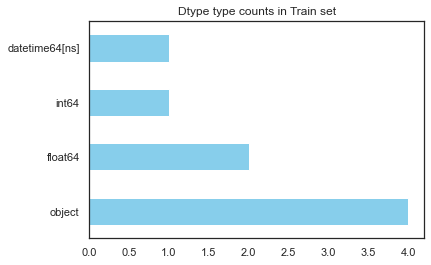

In [9]:
train.dtypes
#test.dtypes

train.dtypes.value_counts().plot(kind = 'barh', color = 'skyblue')
plt.title("Dtype type counts in Train set", fontsize = 12)

Text(0.5, 1.0, 'Dtype counts in Test set')

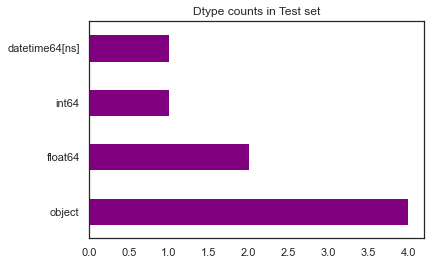

In [10]:
test.dtypes.value_counts().plot(kind = 'barh', color = 'purple')
plt.title("Dtype counts in Test set", fontsize = 12)

Text(0.5, 1.0, 'Boxplot for Train set')

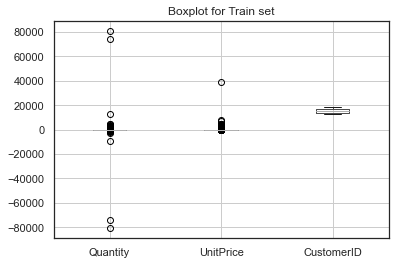

In [11]:
train.boxplot()
plt.title("Boxplot for Train set", fontsize = 12)

Text(0.5, 1.0, 'Boxplot for test set')

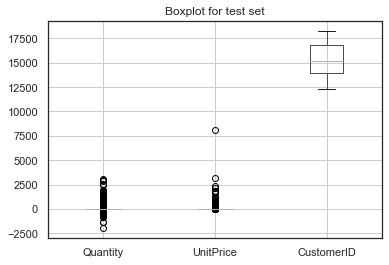

In [12]:
test.boxplot()
plt.title("Boxplot for test set", fontsize = 12)

In [13]:
train['CustomerID'] = train['CustomerID'].apply(lambda x: int(x))
test['CustomerID'] = test['CustomerID'].apply(lambda x: int(x))

In [14]:
print(train['InvoiceDate'].nunique())
print(train['InvoiceDate'].dt.year.unique())
print(train['InvoiceDate'].dt.month.unique())

19427
[2011 2010]
[ 6  5  1 12  9 10  2 11  7  8  3  4]


In [15]:
train['InvoiceMonth'] = train['InvoiceDate'].apply(lambda x: x.strftime('%Y-%m'))
test['InvoiceMonth'] = test['InvoiceDate'].apply(lambda x: x.strftime('%Y-%m'))

train['InvoiceMonth'].unique()

array(['2011-06', '2011-05', '2011-01', '2010-12', '2011-09', '2011-10',
       '2011-02', '2011-11', '2011-07', '2011-08', '2011-03', '2011-04',
       '2011-12'], dtype=object)

<AxesSubplot:xlabel='InvoiceMonth'>

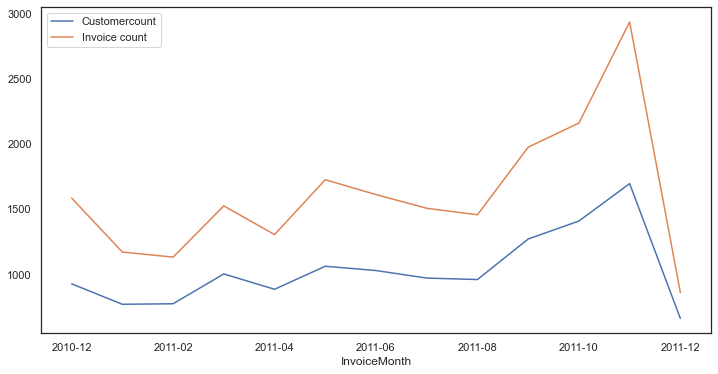

In [16]:
count_group = train.groupby('InvoiceMonth').agg({'CustomerID':pd.Series.nunique,
                                        'InvoiceNo':pd.Series.nunique
                                         })
count_group.columns = ['Customercount','Invoice count']
count_group.plot(figsize = (12, 6))

In [17]:
train['CohortMonth'] = train.groupby('CustomerID')['InvoiceMonth'].transform('min')
test['CohortMonth'] = test.groupby('CustomerID')['InvoiceMonth'].transform('min')

train.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth
1,556072,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,8,2011-06-08 14:57:00,3.75,16126,United Kingdom,2011-06,2011-02
2,551739,21559,STRAWBERRY LUNCH BOX WITH CUTLERY,2,2011-05-04 10:58:00,2.55,18118,United Kingdom,2011-05,2010-12
3,541658,21988,PACK OF 6 SKULL PAPER PLATES,1,2011-01-20 12:16:00,0.85,15529,United Kingdom,2011-01,2010-12
4,538364,85099C,JUMBO BAG BAROQUE BLACK WHITE,10,2010-12-10 17:26:00,1.95,14448,United Kingdom,2010-12,2010-12
5,552306,84789,ENCHANTED BIRD PLANT CAGE,4,2011-05-08 15:20:00,3.75,13911,United Kingdom,2011-05,2011-02


In [18]:
def get_date(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    return year, month

train['InvoiceMonth'] = pd.to_datetime(train['InvoiceMonth'])
train['CohortMonth'] = pd.to_datetime(train['CohortMonth'])
test['InvoiceMonth'] = pd.to_datetime(test['InvoiceMonth'])
test['CohortMonth'] = pd.to_datetime(test['CohortMonth'])

invoice_year, invoice_month = get_date(train, 'InvoiceMonth')
cohort_year, cohortmonth = get_date(train, 'CohortMonth')
year_diff = invoice_year - cohort_year
month_diff = invoice_month - cohortmonth
train['CohortIndex'] = year_diff * 12 + month_diff 


invoice_year, invoice_month = get_date(test, 'InvoiceMonth')
cohort_year, cohortmonth = get_date(test, 'CohortMonth')
year_diff = invoice_year - cohort_year
month_diff = invoice_month - cohortmonth
test['CohortIndex'] = year_diff * 12 + month_diff 

train.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth,CohortIndex
1,556072,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,8,2011-06-08 14:57:00,3.75,16126,United Kingdom,2011-06-01,2011-02-01,4
2,551739,21559,STRAWBERRY LUNCH BOX WITH CUTLERY,2,2011-05-04 10:58:00,2.55,18118,United Kingdom,2011-05-01,2010-12-01,5
3,541658,21988,PACK OF 6 SKULL PAPER PLATES,1,2011-01-20 12:16:00,0.85,15529,United Kingdom,2011-01-01,2010-12-01,1
4,538364,85099C,JUMBO BAG BAROQUE BLACK WHITE,10,2010-12-10 17:26:00,1.95,14448,United Kingdom,2010-12-01,2010-12-01,0
5,552306,84789,ENCHANTED BIRD PLANT CAGE,4,2011-05-08 15:20:00,3.75,13911,United Kingdom,2011-05-01,2011-02-01,3


In [19]:
cohort_data = train.groupby(['CohortMonth', 'CohortIndex'])['CustomerID'].apply(pd.Series.nunique).reset_index()

cohort_count = cohort_data.pivot_table(index = 'CohortMonth',
                                       columns = 'CohortIndex',
                                       values = 'CustomerID')
cohort_count

CohortIndex,0,1,2,3,4,5,6,7,8,9,10,11,12
CohortMonth,,,,,,,,,,,,,
2010-12-01,929.0,350.0,297.0,353.0,332.0,367.0,351.0,322.0,325.0,361.0,344.0,460.0,248.0
2011-01-01,422.0,102.0,120.0,104.0,141.0,122.0,113.0,109.0,132.0,148.0,157.0,66.0,NaN
2011-02-01,377.0,91.0,72.0,101.0,102.0,91.0,95.0,101.0,97.0,117.0,32.0,NaN,NaN
2011-03-01,441.0,81.0,110.0,93.0,101.0,76.0,113.0,103.0,125.0,37.0,NaN,NaN,NaN
2011-04-01,298.0,67.0,65.0,60.0,61.0,71.0,69.0,78.0,23.0,NaN,NaN,NaN,NaN
2011-05-01,278.0,60.0,48.0,48.0,59.0,69.0,74.0,29.0,NaN,NaN,NaN,NaN,NaN
2011-06-01,238.0,46.0,43.0,62.0,57.0,80.0,25.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,192.0,39.0,38.0,45.0,55.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,166.0,38.0,41.0,41.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


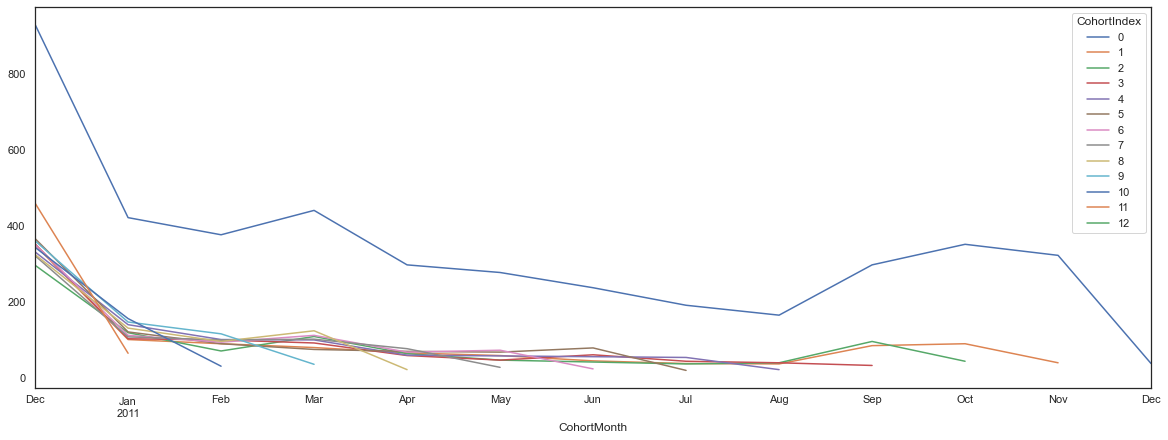

In [20]:
cohort_count.plot(figsize = (20, 7))
plt.show()

In [21]:
cohort_size = cohort_count.iloc[:, 0]
retention = cohort_count.divide(cohort_size, axis = 0)
retention.round(3) * 100

CohortIndex,0,1,2,3,4,5,6,7,8,9,10,11,12
CohortMonth,,,,,,,,,,,,,
2010-12-01,100.0,37.7,32.0,38.0,35.7,39.5,37.8,34.7,35.0,38.9,37.0,49.5,26.7
2011-01-01,100.0,24.2,28.4,24.6,33.4,28.9,26.8,25.8,31.3,35.1,37.2,15.6,NaN
2011-02-01,100.0,24.1,19.1,26.8,27.1,24.1,25.2,26.8,25.7,31.0,8.5,NaN,NaN
2011-03-01,100.0,18.4,24.9,21.1,22.9,17.2,25.6,23.4,28.3,8.4,NaN,NaN,NaN
2011-04-01,100.0,22.5,21.8,20.1,20.5,23.8,23.2,26.2,7.7,NaN,NaN,NaN,NaN
2011-05-01,100.0,21.6,17.3,17.3,21.2,24.8,26.6,10.4,NaN,NaN,NaN,NaN,NaN
2011-06-01,100.0,19.3,18.1,26.1,23.9,33.6,10.5,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,100.0,20.3,19.8,23.4,28.6,10.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,100.0,22.9,24.7,24.7,13.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


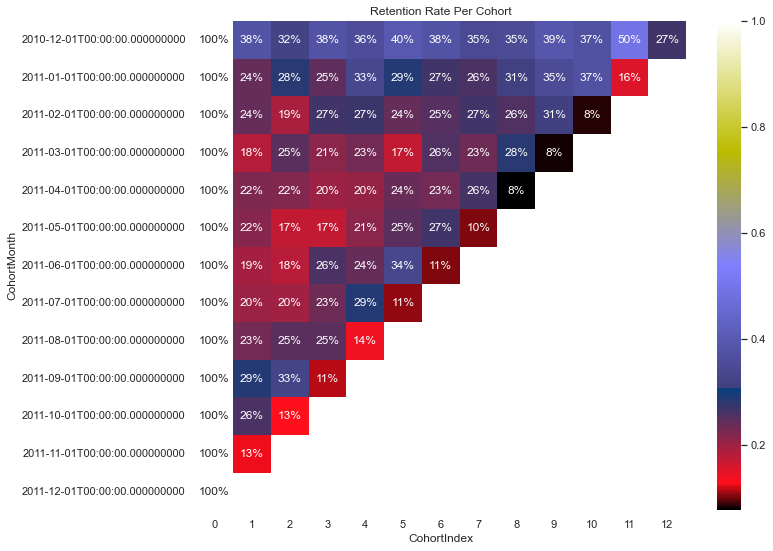

In [22]:
plt.figure(figsize = (11, 9))
plt.title('Retention Rate Per Cohort')
sns.heatmap(data = retention, 
            annot = True, 
            fmt = '.0%',
            cmap = 'gist_stern')
plt.show()

In [23]:
cohort_data2 = train.groupby(['CohortMonth', 'CohortIndex'])['Quantity'].mean().reset_index()

average_qty = cohort_data2.pivot_table(index = "CohortMonth",
                        columns = "CohortIndex",
                        values = "Quantity").round(1)
average_qty

CohortIndex,0,1,2,3,4,5,6,7,8,9,10,11,12
CohortMonth,,,,,,,,,,,,,
2010-12-01,10.7,14.2,14.7,14.2,13.2,14.0,14.5,14.5,16.1,15.7,16.8,12.5,14.5
2011-01-01,10.8,14.3,15.0,10.1,13.1,18.3,15.2,15.8,13.5,11.2,9.6,13.7,NaN
2011-02-01,10.9,11.5,19.5,12.0,10.8,12.2,13.3,12.1,11.1,12.1,14.7,NaN,NaN
2011-03-01,9.5,10.3,12.0,9.2,13.5,11.3,13.5,13.4,9.7,7.5,NaN,NaN,NaN
2011-04-01,9.7,10.1,10.0,11.1,11.1,8.0,10.0,9.4,7.1,NaN,NaN,NaN,NaN
2011-05-01,12.0,9.1,12.7,15.3,11.2,8.5,10.5,7.7,NaN,NaN,NaN,NaN,NaN
2011-06-01,10.3,12.3,10.7,13.5,10.0,9.7,9.6,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,9.7,12.2,8.4,9.9,7.1,7.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,10.0,6.3,5.5,6.2,7.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


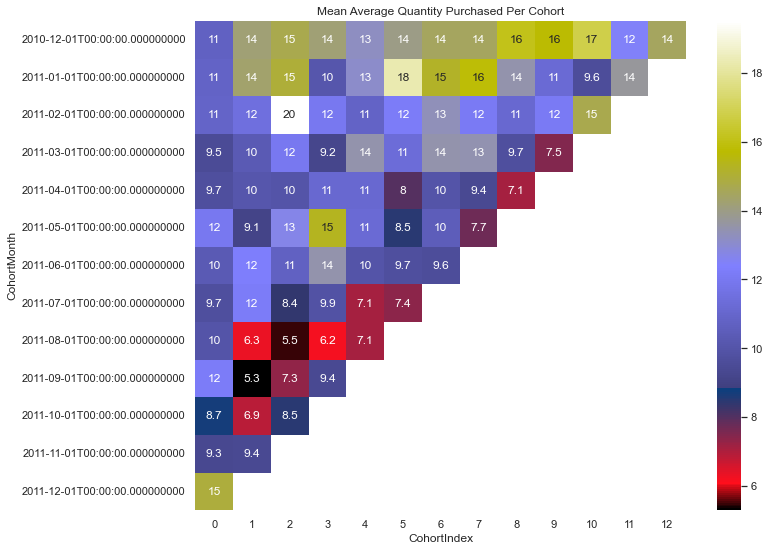

In [24]:
plt.figure(figsize = (11,9))
plt.title('Mean Average Quantity Purchased Per Cohort')
sns.heatmap(data = average_qty, 
            annot = True, 
            cmap = "gist_stern")
plt.show()

In [25]:
train['Sales'] = train['Quantity'] * train['UnitPrice']
test['Sales'] = test['Quantity'] * test['UnitPrice']

train[['InvoiceNo','InvoiceDate','CustomerID','Sales']].head()

,InvoiceNo,InvoiceDate,CustomerID,Sales
1,556072,2011-06-08 14:57:00,16126,30.00
2,551739,2011-05-04 10:58:00,18118,5.10
3,541658,2011-01-20 12:16:00,15529,0.85
4,538364,2010-12-10 17:26:00,14448,19.50
5,552306,2011-05-08 15:20:00,13911,15.00


In [26]:
from datetime import timedelta
tym = train['InvoiceDate'].max() + timedelta(days = 1)
tym

Timestamp('2011-12-10 12:50:00')

In [27]:
rfm = train.groupby('CustomerID').agg({
                                        'InvoiceDate' : lambda x: (tym-x.max()).days,
                                         'InvoiceNo'  : lambda x: len(x),
                                         'Sales' : lambda x : sum(x)
                                       })
rfm.rename(columns = {'InvoiceDate': 'Recency',
                         'InvoiceNo': 'Frequency',
                         'Sales': 'MonetaryValue'}, inplace = True)

rfm.head()

,Recency,Frequency,MonetaryValue
CustomerID,,,
12346,326,2,0.00
12347,2,132,3124.96
12348,75,20,1009.88
12349,19,50,1344.17
12350,310,11,213.30


In [28]:
r_labels = range(4, 0, -1)
f_labels = range(1, 5)
m_labels = range(1, 5)

# Assign these labels to 4 equal percentile groups 
r_groups = pd.qcut(rfm['Recency'], q = 4, labels = r_labels)
# Assign these labels to 4 equal percentile groups 
f_groups = pd.qcut(rfm['Frequency'], q = 4, labels = f_labels)
# Assign these labels to three equal percentile groups 
m_groups = pd.qcut(rfm['MonetaryValue'], q = 4, labels = m_labels)

In [29]:
print(r_groups[:5])
print(f_groups[:5])
print(m_groups[:5])

CustomerID
12346    1
12347    4
12348    2
12349    3
12350    1
Name: Recency, dtype: category
Categories (4, int64): [4 < 3 < 2 < 1]
CustomerID
12346    1
12347    4
12348    2
12349    3
12350    1
Name: Frequency, dtype: category
Categories (4, int64): [1 < 2 < 3 < 4]
CustomerID
12346    1
12347    4
12348    3
12349    4
12350    2
Name: MonetaryValue, dtype: category
Categories (4, int64): [1 < 2 < 3 < 4]


In [30]:
rfm = rfm.assign(R = r_groups.values, F = f_groups.values, M = m_groups.values)
rfm.head()

,Recency,Frequency,MonetaryValue,R,F,M
CustomerID,,,,,,
12346,326,2,0.00,1,1,1
12347,2,132,3124.96,4,4,4
12348,75,20,1009.88,2,2,3
12349,19,50,1344.17,3,3,4
12350,310,11,213.30,1,1,2


In [31]:
rfm['RFM_segment'] = rfm.apply(lambda x: (str(x['R']) + str(x['F']) + str(x['M'])), axis=1)
rfm.head()

,Recency,Frequency,MonetaryValue,R,F,M,RFM_segment
CustomerID,,,,,,,
12346,326,2,0.00,1,1,1,1.01.01.0
12347,2,132,3124.96,4,4,4,4.04.04.0
12348,75,20,1009.88,2,2,3,2.02.03.0
12349,19,50,1344.17,3,3,4,3.03.04.0
12350,310,11,213.30,1,1,2,1.01.02.0


In [32]:
rfm['RFM_Score'] = rfm[['R','F','M']].sum(axis = 1)
rfm['RFM_Score'] = rfm['RFM_Score'].apply(lambda x : int(x))
rfm.head()

,Recency,Frequency,MonetaryValue,R,F,M,RFM_segment,RFM_Score
CustomerID,,,,,,,,
12346,326,2,0.00,1,1,1,1.01.01.0,3
12347,2,132,3124.96,4,4,4,4.04.04.0,12
12348,75,20,1009.88,2,2,3,2.02.03.0,7
12349,19,50,1344.17,3,3,4,3.03.04.0,10
12350,310,11,213.30,1,1,2,1.01.02.0,4


In [33]:
print(rfm['RFM_segment'].nunique())
print(rfm['RFM_Score'].unique())
rfm[rfm['RFM_segment'] == '444'].head()

61
[ 3 12  7 10  4 11  6  8  9  5]


,Recency,Frequency,MonetaryValue,R,F,M,RFM_segment,RFM_Score
CustomerID,,,,,,,,


In [34]:
def rfm_level(df):
    if df['RFM_Score'] >= 9:
        return 'Important'
    elif ((df['RFM_Score'] >= 8) and (df['RFM_Score'] < 9)):
        return 'Good'
    elif ((df['RFM_Score'] >= 7) and (df['RFM_Score'] < 8)):
        return 'Okay'
    elif ((df['RFM_Score'] >= 6) and (df['RFM_Score'] < 7)):
        return 'Neutral'
    elif ((df['RFM_Score'] >= 5) and (df['RFM_Score'] < 6)):
        return 'Might'
    elif ((df['RFM_Score'] >= 4) and (df['RFM_Score'] < 5)):
        return 'Needs Attention'
    else:
        return 'Activate'
# Create a new variable RFM_Level
rfm['RFM_Level'] = rfm.apply(rfm_level, axis=1)
rfm.head()

,Recency,Frequency,MonetaryValue,R,F,M,RFM_segment,RFM_Score,RFM_Level
CustomerID,,,,,,,,,
12346,326,2,0.00,1,1,1,1.01.01.0,3,Activate
12347,2,132,3124.96,4,4,4,4.04.04.0,12,Important
12348,75,20,1009.88,2,2,3,2.02.03.0,7,Okay
12349,19,50,1344.17,3,3,4,3.03.04.0,10,Important
12350,310,11,213.30,1,1,2,1.01.02.0,4,Needs Attention


In [35]:
rfm_level_agg = rfm.groupby('RFM_Level').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue': ['mean', 'count']
}).round(1)

rfm_level_agg

Recency Frequency MonetaryValue      
                   mean      mean          mean count
RFM_Level                                            
Activate          264.9       5.6          74.0   393
Good               61.5      39.8         670.5   496
Important          25.6     136.6        2901.9  1668
Might             145.3      14.5         233.4   505
Needs Attention   180.3       9.9         156.7   399
Neutral           100.0      20.1         368.7   458
Okay               80.6      27.9         505.9   434

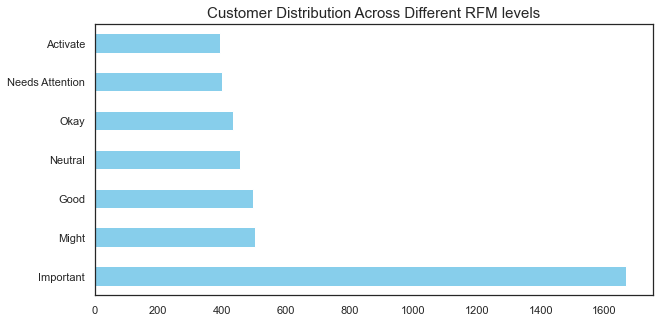

In [36]:
rfm['RFM_Level'].value_counts().plot(kind = 'barh', figsize = (10, 5), color = 'skyblue')
plt.title('Customer Distribution Across Different RFM levels', fontsize = 15)
plt.show()

In [37]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [38]:
cols = ['CustomerID','Sales']
x_train = train[cols]

sc = StandardScaler()
x_train_scaled = sc.fit_transform(x_train)

In [39]:
wcss = []

for i in range(1, 12):
    
    kmeans = KMeans(n_clusters = i, 
                    init       = 'k-means++', 
                    max_iter   = 300, 
                    n_init     = 10, 
                    random_state = 0)
    
    kmeans.fit(x_train_scaled)
    
    wcss.append(kmeans.inertia_)

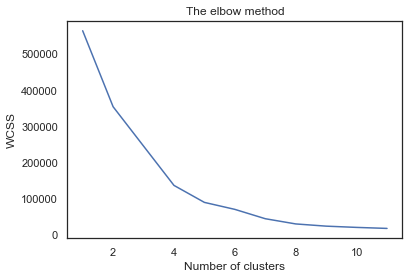

In [40]:
plt.plot(range(1, 12), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()

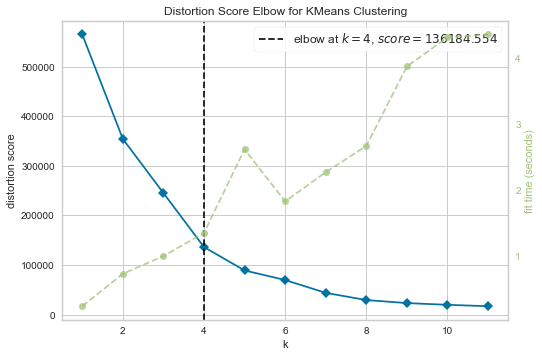

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [41]:
from yellowbrick.cluster import KElbowVisualizer
visualizer = KElbowVisualizer(kmeans, k = (1, 12))
visualizer.fit(x_train_scaled)    
visualizer.show()  

In [42]:
x_test = test[cols]
x_test_scaled = sc.fit_transform(x_test)

In [43]:
kmeans = KMeans(n_clusters = 4,  # optimum cluster
                    init       = 'k-means++', 
                    max_iter   = 300, 
                    n_init     = 10, 
                    random_state = 0)

y_pred = kmeans.fit_predict(x_test_scaled)

In [44]:
test['Cluster'] = y_pred
y_pred_train = kmeans.fit_predict(x_train_scaled)
train['Cluster'] = y_pred_train

In [45]:
test['Cluster'].unique()
test['Cluster'].value_counts()


0    64572
1    55959
3      708
2       46
Name: Cluster, dtype: int64